<a href="https://colab.research.google.com/github/Somnath98/EDA-Airbnb/blob/main/Air_Bnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

EDA on price

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset =pd.read_csv('/content/drive/MyDrive/AB/Module 1/EDA Projects/Ari Bnb/Copy of Airbnb NYC 2019.csv')

In [7]:
df= pd.read_csv('/content/drive/MyDrive/AB/Module 1/EDA Projects/Ari Bnb/Copy of Airbnb NYC 2019.csv')

In [8]:
dataset.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
dataset.describe().price

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

lets find out which neighbourhood group has highest room price  i.e 10000 

In [10]:
dataset[dataset['price']==10000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


from prices of different rooms we can find minimun,average and maximum price.

In [11]:
avg_price = dataset['price'].mean()
print('average room price is : ',avg_price)
min_price = dataset['price'].min()
print('minimum room price is : ',min_price)
max_price = dataset['price'].max()
print('maximum maximum price is : ',max_price)


average room price is :  152.7206871868289
minimum room price is :  0
maximum maximum price is :  10000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


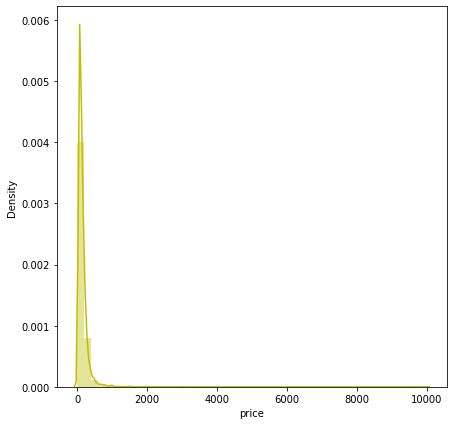

In [12]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['price'],color="y")

above plot shows that most of rooms has price between 0 to 1000.

In [15]:
dataset['price_group'] = dataset['price'].apply(lambda x : 0 if x<100 else (1 if 100<= x < 200 else 2))
dataset['price_group'].value_counts()

0    21877
1    17233
2     9785
Name: price_group, dtype: int64

there are..

 21877 rooms having price less than 100

 17233 rooms havind price between 100 to 200
 
 9785 rooms having price greater than 200

<Figure size 2160x720 with 0 Axes>

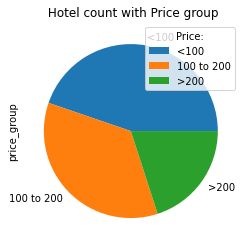

In [16]:
plt.figure(figsize=(30, 10))
df1 = pd.DataFrame(dataset.groupby(['price_group'])['price_group'].value_counts().sort_values(ascending = False))
mylabels = ["<100", "100 to 200", ">200"]
df1.plot.pie(subplots=True,labels = mylabels)
plt.legend(title = "Price:")
plt.title(' Hotel count with Price group')

plt.show()

plot shows number of rooms in different groups

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


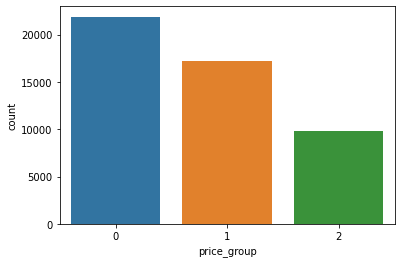

In [17]:
sns.countplot(dataset['price_group'])

from above plot we can conclude that most of rooms has price less than 100 and less no. of rooms has price greater than 200

<Figure size 1440x432 with 0 Axes>

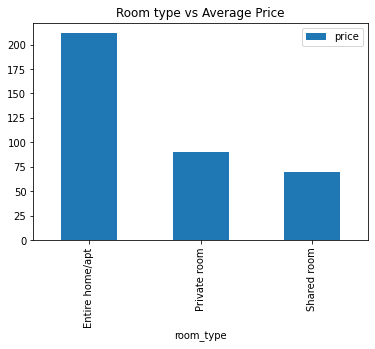

In [18]:
plt.figure(figsize=(20, 6))
df = pd.DataFrame(dataset.groupby(['room_type'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Room type vs Average Price')
plt.show()

above plot shows the average price of with respect to room type.

Entire home has highest average price as compared to private and shared room.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


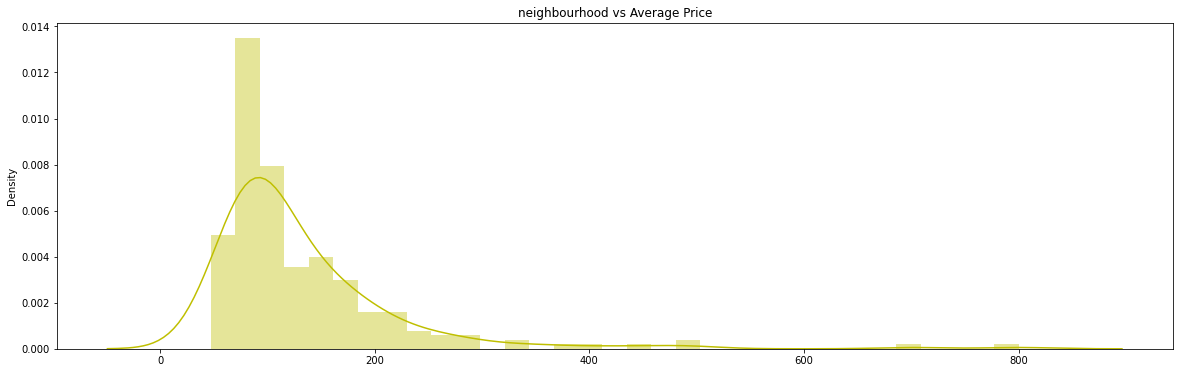

In [19]:
plt.figure(figsize=(20, 6))
df = pd.DataFrame(dataset.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False))
sns.distplot(df,color="y")
plt.title('neighbourhood vs Average Price')
plt.show()

In [20]:
df

,price
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
...,...
New Dorp,57.000000
Soundview,53.466667
Tremont,51.545455


<Figure size 1440x432 with 0 Axes>

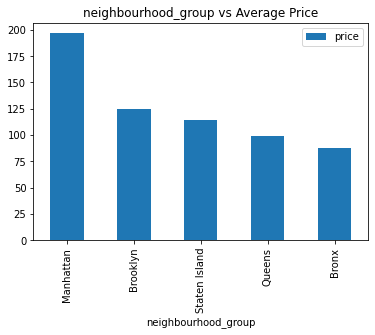

In [21]:
plt.figure(figsize=(20, 6))
df = pd.DataFrame(dataset.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('neighbourhood_group vs Average Price')
plt.show()

above bar plot describes the average price of each neighbourhood group.

Manhattan neighbourhood group has higher prices and Bronx neighbourhood group has lowest prices.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


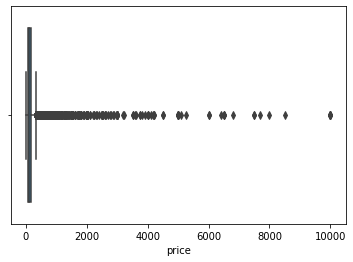

In [22]:
sns.boxplot(dataset['price'])

In [23]:
dataset.shape

(48895, 17)

In [24]:
position_outlier = np.where(dataset['price']>300)
list(position_outlier)

[array([   61,    85,   103, ..., 48839, 48842, 48856])]

In [25]:
dataset_copy = dataset.copy()
dataset_copy.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2


In [26]:
dataset_copy.drop(position_outlier[0],axis=0,inplace=True)


In [27]:
dataset_copy

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_group
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0


In [28]:
dataset_copy.shape

(45538, 17)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


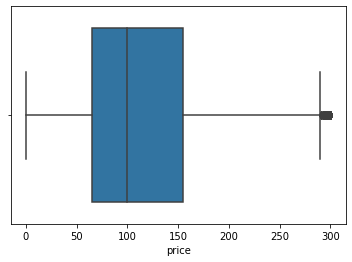

In [29]:
sns.boxplot(dataset_copy['price'])

# Neighborhood Analysis

In [31]:
df= dataset

In [32]:
print('Total Number of Obervations',len(df['neighbourhood']))
print('Total Unique Values',len(df.neighbourhood.unique()))

Total Number of Obervations 48895
Total Unique Values 221


In [33]:
#Finding Which Neighbourhood had Maximum Bookings

max_bookings=df['neighbourhood'].mode()
print(f"{max_bookings} has Maximum bookings with {df['neighbourhood'].value_counts().Williamsburg} bookings")
print('Percentage of total Bookings', round(392000/48895,2),'%')
print(f'So, out of 221 Destinations, {round(100/221,2)}% of destinations have {round(392000/48895,2)} % bookings ')

0    Williamsburg
dtype: object has Maximum bookings with 3920 bookings
Percentage of total Bookings 8.02 %
So, out of 221 Destinations, 0.45% of destinations have 8.02 % bookings 


No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(18, 3933, 'Max Boolings(3920)')

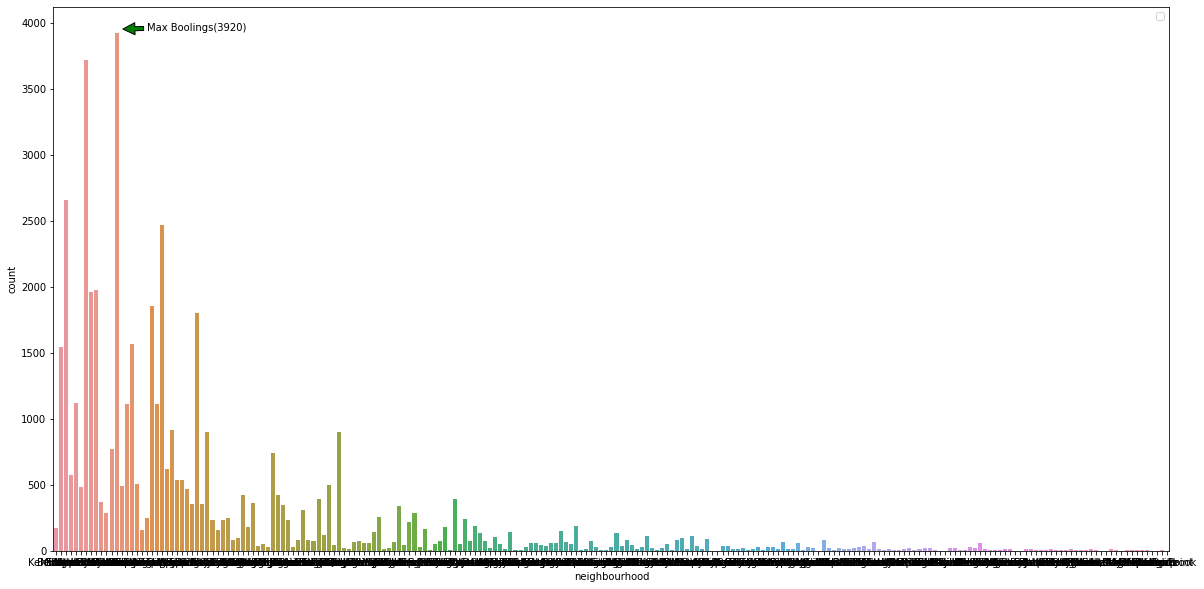

In [34]:
plt.figure(figsize=(20,10))
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('Values')
sns.countplot(df['neighbourhood'])
plt.annotate('Max Boolings(3920)',xy=(13,3950), xytext=(18,3933), arrowprops = dict(facecolor ='green', shrink = 0.05),)


In [35]:
max_bookings_details= df.groupby(df['neighbourhood'])['room_type'].value_counts().Williamsburg
print(max_bookings_details)

room_type
Private room       1997
Entire home/apt    1891
Shared room          32
Name: room_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.9, 1000, '1891')

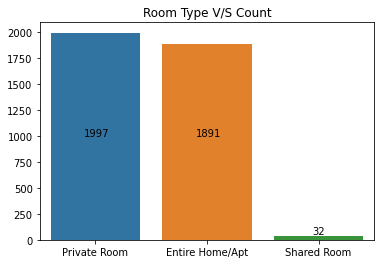

In [40]:
plt.figure(figsize=(6,4))
plt.title('Room Type V/S Count')
#sns.countplot(max_bookings_details)

x= ['Private Room','Entire Home/Apt', 'Shared Room']
y= [1997,1891,32]
#plt.bar(x,y)
sns.barplot(x,y)
plt.annotate('1997',xy=(1,1), xytext=(-0.1,1000),)
plt.annotate('32',xy=(.7,.5), xytext=(1.94,50),)
plt.annotate('1891',xy=(.5,.5), xytext=(.9,1000),)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The Average price of Private Room is 85.76
The Average price of Entire Home/Apt is 206.09
The Average price of Shared Room is 84.94


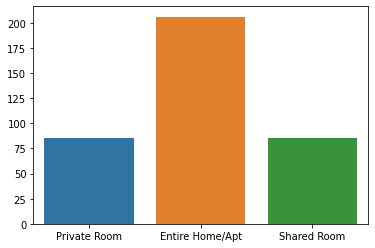

In [38]:
#Average Cost of Williamburg
avg_pr=sumpr/1997
avg_eh=sumeh/1891
avg_sr=sumsr/32
x= ['Private Room','Entire Home/Apt', 'Shared Room']
y= [round(avg_pr,2),round(avg_eh,2),round(avg_sr,2)]
#plt.bar(x,y)
sns.barplot(x,y)

for i in range(3):
  print(f'The Average price of {x[i]} is {y[i]}')


                      price
room_type                  
Entire home/apt  211.794246
Private room      89.780973
Shared room       70.127586


<Figure size 1440x432 with 0 Axes>

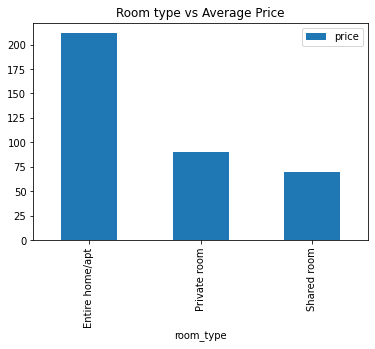

In [39]:
#Average Cost of Entire Rooms
plt.figure(figsize=(20, 6))
df1 = pd.DataFrame(df.groupby(['room_type'])['price'].mean().sort_values(ascending = False))
print(df1)
df1.plot.bar()
plt.title('Room type vs Average Price')
plt.show()

#Host Name Analysis

In [43]:
new_air_df=dataset

In [44]:
new_air_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_group'],
      dtype='object')

In [45]:
new_air_df.host_name.nunique()

11452

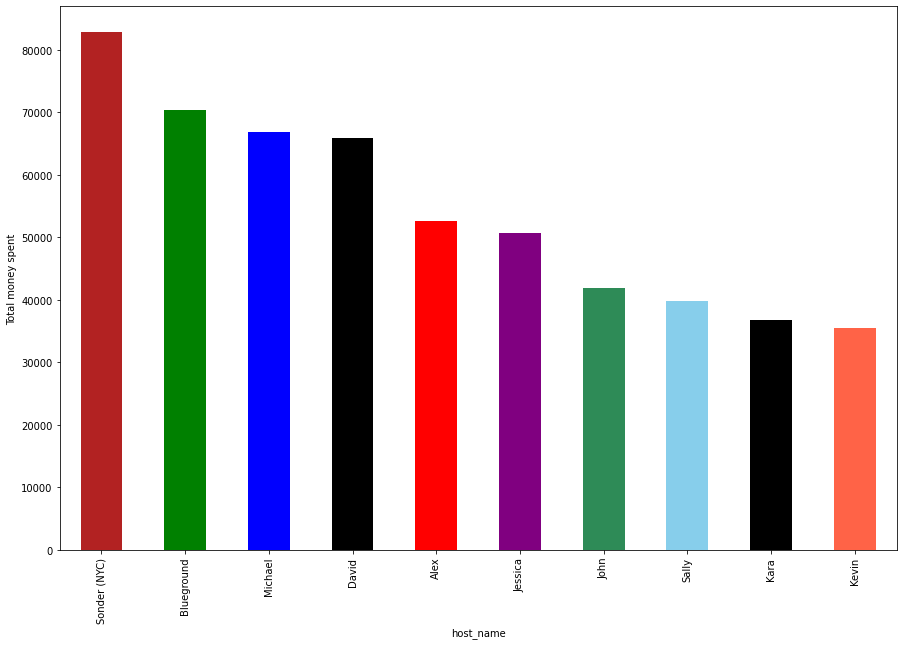

In [46]:
# Top 10 hosts which have higher spending value

top_10_affluent_hosts = new_air_df.groupby(['host_name'])['price'].sum().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=[15,10])
top_10_affluent_hosts.plot(kind= 'bar', ylabel= 'Total money spent', color = ['firebrick', 'green', 'blue', 'black', 'red', 
                                                                              'purple', 'seagreen', 'skyblue', 'black', 'tomato'])

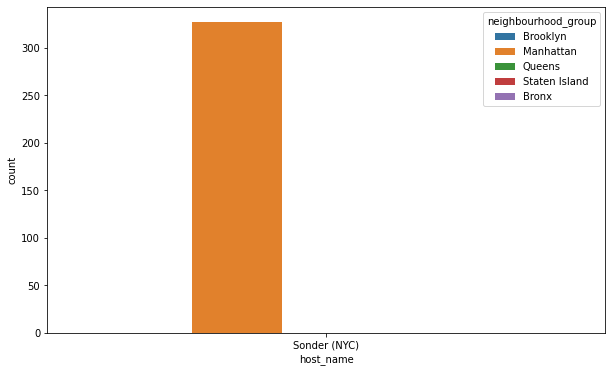

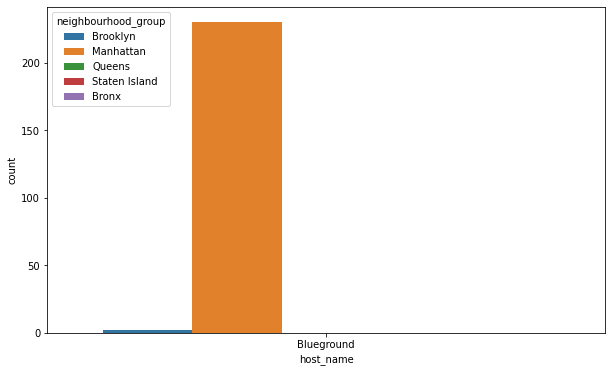

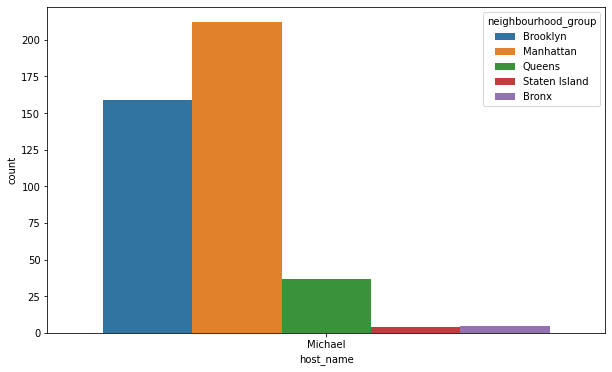

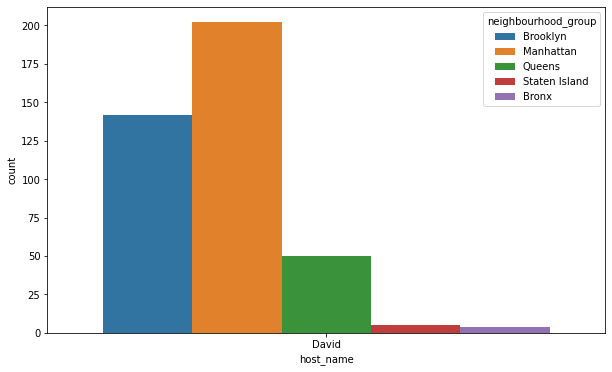

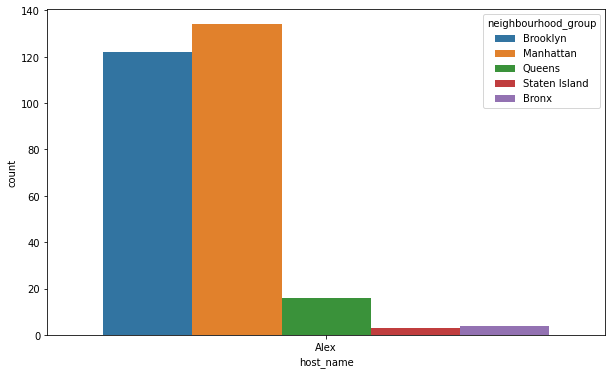

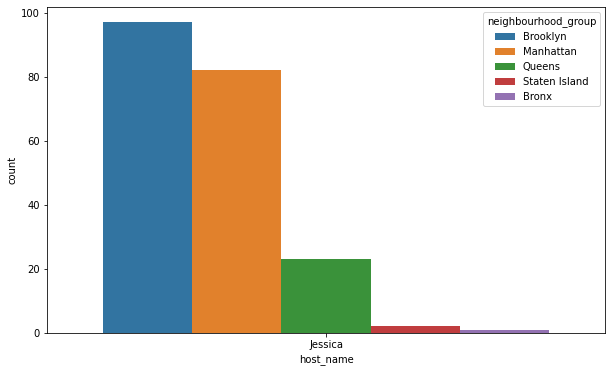

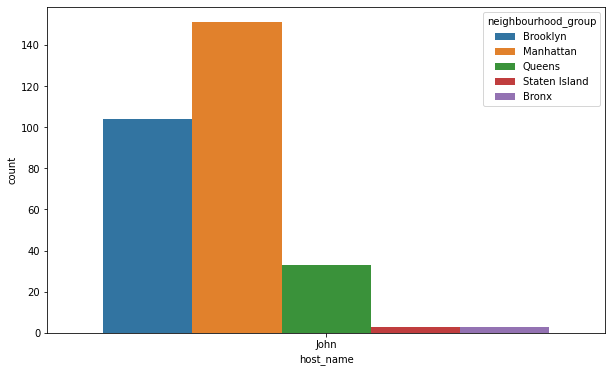

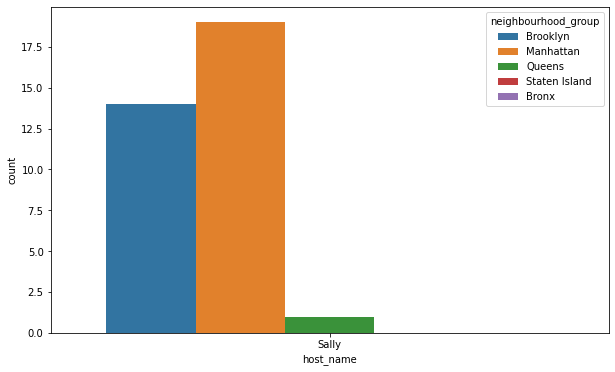

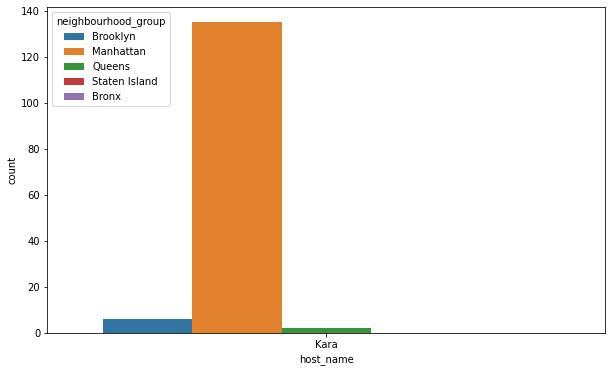

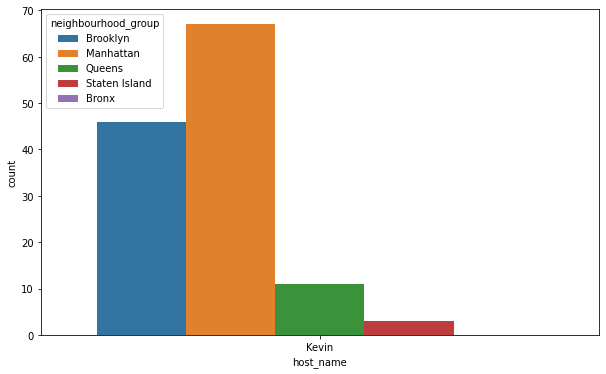

In [47]:
# Which neighbourhood_group are most visited by this top 10 highly spending hosts

for index, col in top_10_affluent_hosts.items():
  
  plt.figure(figsize=[10,6])
  sns.countplot(x = new_air_df[new_air_df['host_name']==index]['host_name'], hue=new_air_df['neighbourhood_group'])

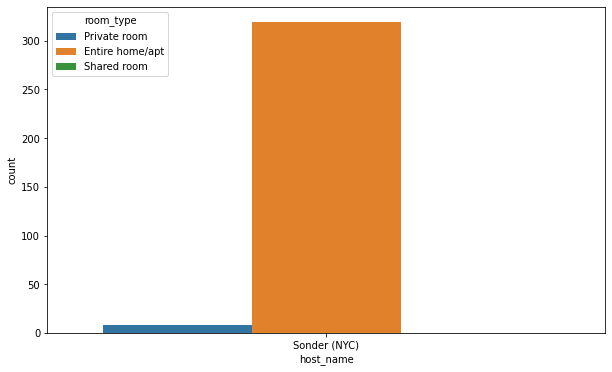

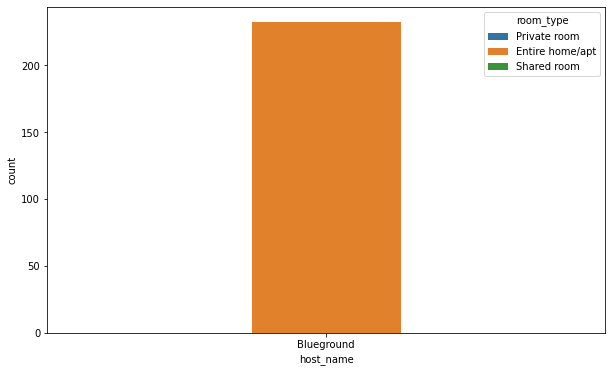

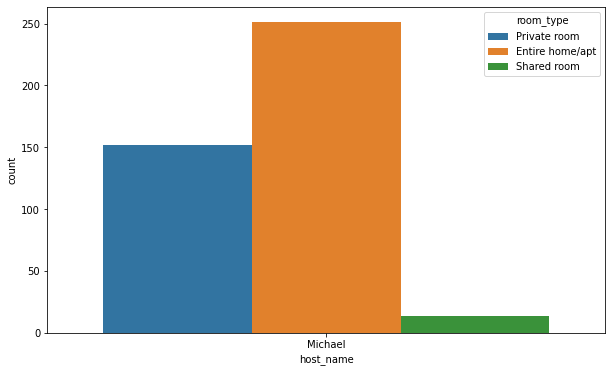

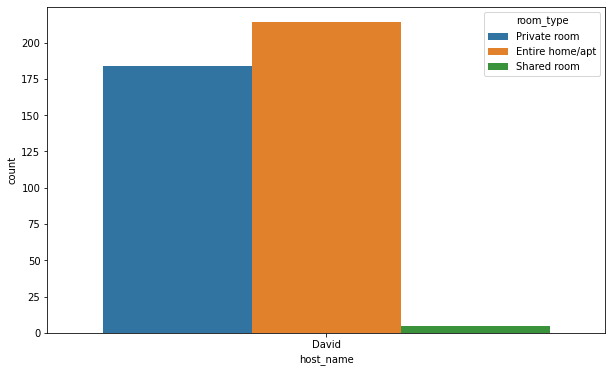

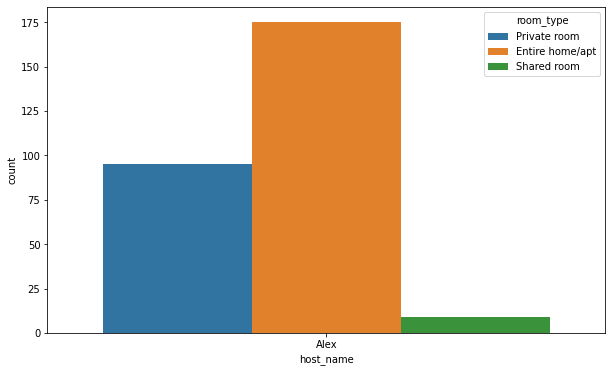

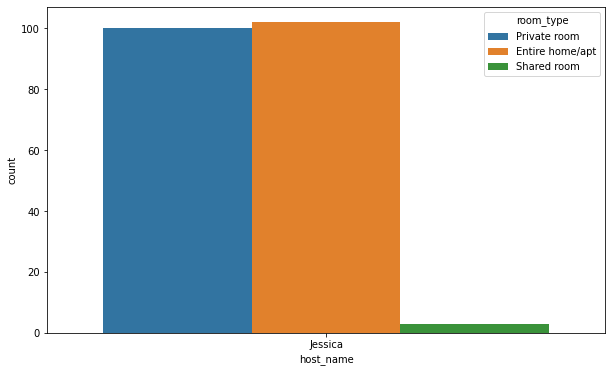

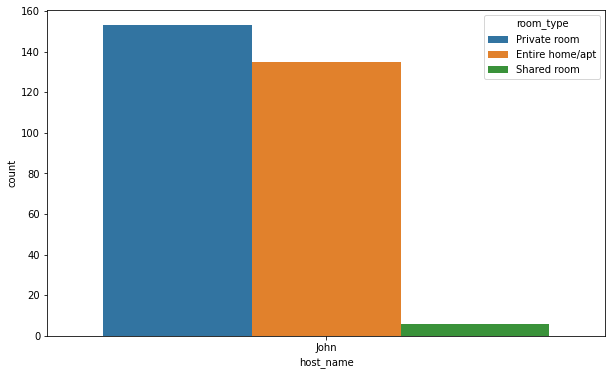

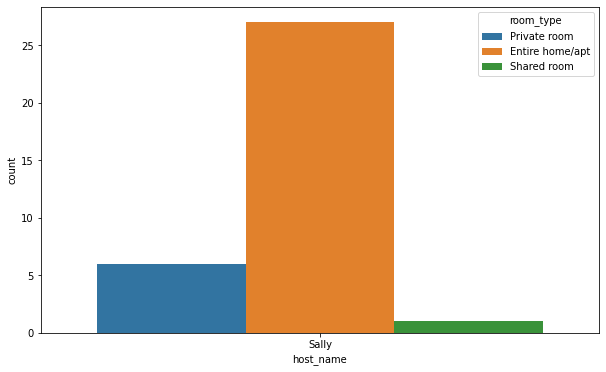

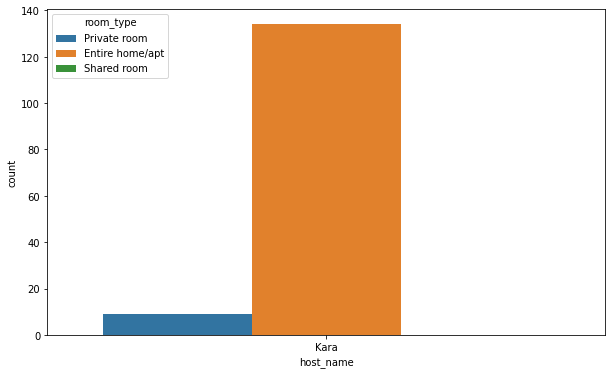

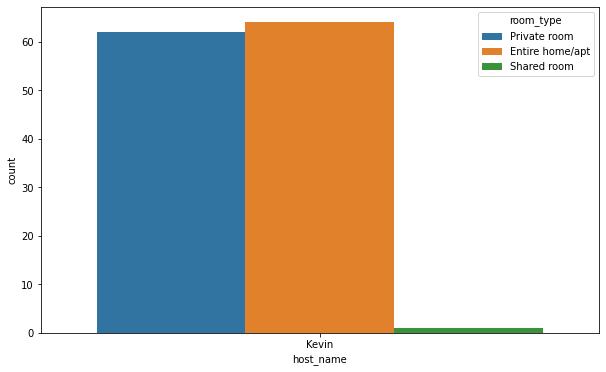

In [48]:
# Which room_type do ouraffluent hosts prefer

for index, col in top_10_affluent_hosts.items():
  
  plt.figure(figsize=[10,6])
  sns.countplot(x = new_air_df[new_air_df['host_name']==index]['host_name'], hue=new_air_df['room_type'])